# Implmenting Linear Regression and Random Forest Regressor

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Utils
def average(lst): 
    return sum(lst) / len(lst) 

days = [1,2,3,4,5,6,7,14,21,28]
# IMPORTANT: Seeds to try
seeds = [1,2,3,4,5]

# Create a StandardScaler instance
scaler = StandardScaler()

### Columns Description

*Corresponding to the number of instances before a certain polling release date (e.g 24 XPosts located on a 1_1_ file belong to the number of X posts for candidate 1 over a span of 1 day before a specified date)*

* XPosts: Number of overall posts in X (Twitter)
* Xcomments: Number of overall comments in X
* XRts: Number of overall Rt´s in X
* XLikes: Number of overall likes in X
* XCommsPPost: Average number of comments per post for X
* XRtsPPost: Average number of Rts per post for X
* XLikesPPost: Average number of likes per post for X

* FBPosts: Number of overall posts in Facebook
* FBReactions: Number of overall reactions in Facebook
* FBComments: Number of overall comments in Facebook
* FBShares: Number of overall comments in Facebook
* FBCommsPPost: Average number of comments per post for Facebook
* FBReactsPPost: Average number of reactions per post for Facebook
* FBLikesPPost: Average number of likes per post for Facebook

* IGPosts: Number of overall posts in Instagram
* IGLikes: Number of overall likes in Instagram
* IGLikesPPost: Average number of likes per post for Instagram

* YTPosts: Number of overall posts in YouTube
* YTViews: Number of overall views in YouTube
* YTViewsPPost: Average number of views per post for YouTube

* Target: the reported vote share for the candidate


In [3]:
#Setting columns to use (see New_DB)
columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost', 'Target']

target = ['Target']

feature_columns = ['XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost', 'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments', 'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts', 'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost']

In [53]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=len(feature_columns)):
    df = (pd.DataFrame({"features": feature_columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

## Predictions

In [97]:
model2 = RandomForestRegressor(random_state=42)
model1 = LinearRegression()

pre_predictions = []
predictions = []
importances = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


for i in days:
  # Scan the file and set data
  data = pd.read_csv(f'../claudia/1_{i}.csv', usecols=columns, encoding="utf-8")
  # Training and testing data; Remove last row which is the testing row
  training = data.iloc[:-1]
  testing = pd.DataFrame(data.iloc[-1])
  testing = testing.T

  # Splitting
  X_train = training[feature_columns]
  X_test = testing[feature_columns]

  x_train_scaled = scaler.fit_transform(X_train)
  x_test_scaled = scaler.transform(X_test)

  y_train = training[target]
  y_test = testing[target] 
  
  model2.fit(x_train_scaled, y_train)

  prediction = model2.predict(x_test_scaled)
  predictions.append(prediction)

  importances = importances + model2.feature_importances_


c:\Users\usuario\Documents\MCC\Thesis\Project\2024_Project\new_election\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\usuario\Documents\MCC\Thesis\Project\2024_Project\new_election\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\usuario\Documents\MCC\Thesis\Project\2024_Project\new_election\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\usuario\Documents\MCC\Thesis\Pr

In [98]:
average(predictions)

array([56.07806782])

In [99]:
importances = importances/len(predictions)

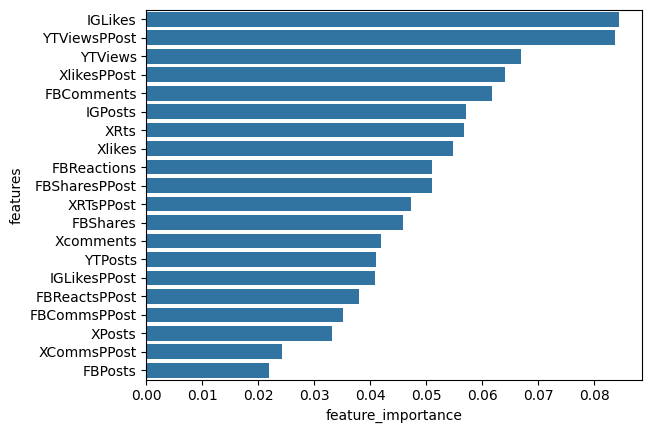

In [100]:
plot_features(X_train.columns, importances)

In [96]:
mean_absolute_error(y_test, average(predictions))

3.054939393939403